In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
df=pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


# Exploratory Data Analysis (EDA)

In [8]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [9]:
df[['stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type']]


,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type
0,tapering,cup,smooth,silky,gray,yellow,partial
1,enlarging,rooted,silky,silky,cinnamon,brown,universal
2,tapering,cup,scaly,silky,yellow,gray,universal
3,enlarging,club,smooth,scaly,yellow,pink,partial
4,enlarging,missing,fibrous,scaly,gray,white,universal
...,...,...,...,...,...,...,...
1995,tapering,bulbous,silky,silky,pink,orange,partial
1996,tapering,rhizomorphs,fibrous,fibrous,pink,orange,partial
1997,tapering,missing,smooth,silky,brown,red,partial
1998,enlarging,rooted,scaly,fibrous,gray,pink,universal


In [10]:
df = df.drop(['Unnamed: 0'], axis=1)


In [11]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [12]:
df.shape

(2000, 25)

In [13]:
df.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(1024)

In [15]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [16]:
print(df.describe())

       stalk_height  cap_diameter
count   2000.000000   2000.000000
mean       8.449118     12.314345
std        3.697217      7.048845
min        2.000000      1.000000
25%        5.291009      5.723521
50%        8.318596     12.124902
75%       11.781272     18.698605
max       15.095066     25.000054


In [17]:
print(df['class'].value_counts())


class
poisonous    1400
edible        600
Name: count, dtype: int64


# Data Preprocessing

In [18]:
X = df.drop('class', axis=1)
y = df['class']


In [27]:
X_encoded = pd.get_dummies(X)
X_encoded

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1996,6.500840,13.501957,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1997,13.558064,11.270020,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1998,11.092703,8.423199,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [28]:
y_encoded = y.map({'edible': 0, 'poisonous': 1})
# target col
y_encoded

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled 

array([[ 1.57645935, -1.03012304, -0.49765514, ..., -0.43318409,
         2.4784788 , -0.41595736],
       [-1.21646308,  0.95840718, -0.49765514, ..., -0.43318409,
         2.4784788 , -0.41595736],
       [ 0.16371736, -0.72490441, -0.49765514, ..., -0.43318409,
         2.4784788 , -0.41595736],
       ...,
       [ 1.38218107, -0.14819255, -0.49765514, ..., -0.43318409,
        -0.40347329,  2.40409256],
       [ 0.71519905, -0.55216407,  2.00942364, ..., -0.43318409,
        -0.40347329,  2.40409256],
       [ 1.24916951,  1.24055562, -0.49765514, ...,  2.30848737,
        -0.40347329, -0.41595736]], shape=(2000, 126))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


# SVM Implementation

In [36]:


model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Example with RBF kernel
model.fit(X_train, y_train)


SVC()

In [37]:


# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70       133
           1       0.81      0.99      0.89       267

    accuracy                           0.84       400
   macro avg       0.88      0.77      0.79       400
weighted avg       0.86      0.84      0.83       400

Confusion Matrix:
 [[ 73  60]
 [  4 263]]


# visualizations

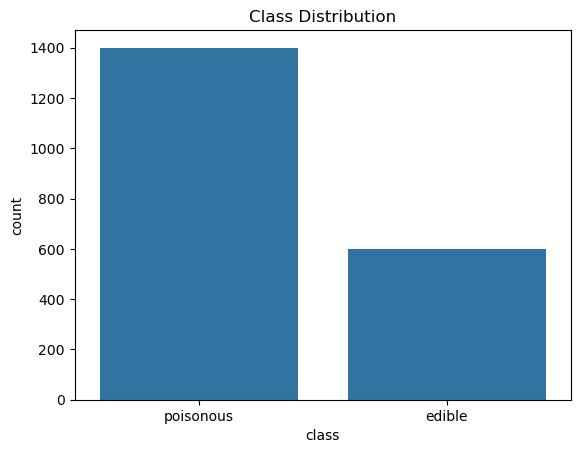

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


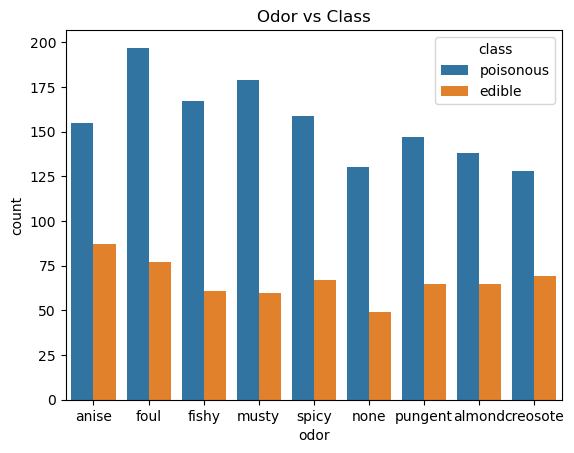

In [21]:
sns.countplot(x='odor', hue='class', data=df)
plt.title('Odor vs Class')
plt.show()


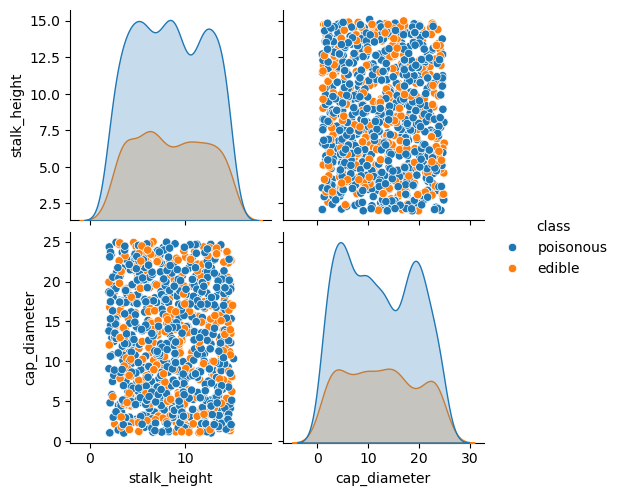

In [22]:
sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()


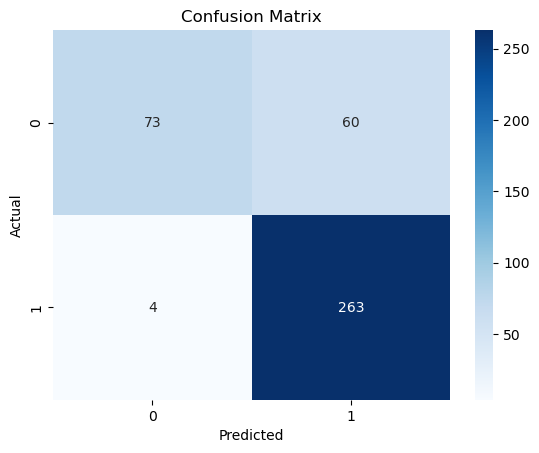

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<Axes: >

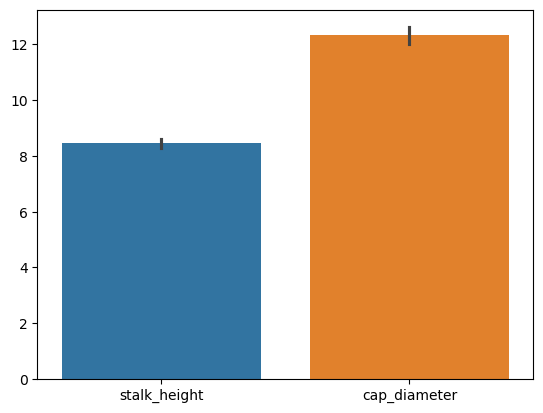

In [40]:
sns.barplot(df)

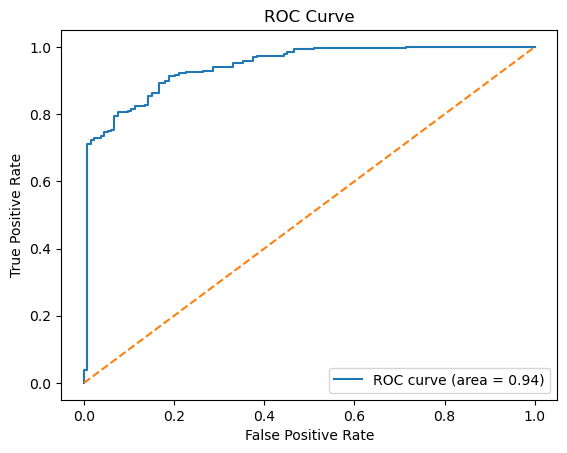

In [43]:
from sklearn.metrics import roc_curve, auc

y_scores = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# PCA visualization for understanding data spread

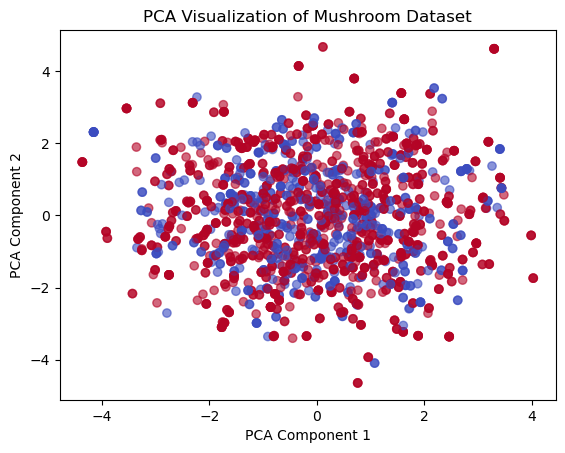

In [45]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Mushroom Dataset')
plt.show()


# Parameter Tuning and Optimization

In [44]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    model = SVC(kernel=k, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Kernel: {k}, Accuracy: {acc:.4f}")


Kernel: linear, Accuracy: 0.6675
Kernel: poly, Accuracy: 0.8850
Kernel: rbf, Accuracy: 0.8400
Kernel: sigmoid, Accuracy: 0.6600


# Comparison and Analysis

rbf kernel often performs best with high-dimensional data.

Linear kernel is faster but may not capture complex patterns.

Polynomial kernel can model interactions but may overfit.

Sigmoid kernel behaves like a neural network but may not generalize well.

# Analyze SVM strengths and weaknesses for the Mushroom dataset

Strengths:

- Works well with high-dimensional data after one-hot encoding
 
- Handles non-linear relationships using kernels
 
- Good generalization with appropriate tuning

Weaknesses:

- Sensitive to parameter choices (C, gamma)

- Requires scaling of features

- Computationally expensive with large datasets and many features

# Discuss practical implications of SVM in real-world classification

✔ Use cases:

Medical diagnosis (like identifying poisonous mushrooms)

Fraud detection

Image recognition with proper preprocessing

✔ Considerations:

Requires preprocessing (encoding and scaling)

Hyperparameter tuning is crucial for optimal results

Interpretability is harder than simpler models like decision trees

final Thoughts

i have implemented and evaluated SVM on a real-world dataset.

Visualization helped understand classification behavior.

Parameter tuning improved performance.

Comparison of kernels provided insight into model choice.

Understanding practical implications prepares you to apply SVM effectively.